### Nash Equilibrium Occurrences with different number of Low-Quality Clients with Noise std = 0.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def plot_nash_equilibrium(csv_filename, algorithm_name, dataset_name, top_n=None):

    df = pd.read_csv(csv_filename, dtype={"Nash Equilibrium": str})  

    count_columns = [col for col in df.columns if col != "Nash Equilibrium"]
    df["Total Occurrences"] = df[count_columns].sum(axis=1)
    

    df = df.sort_values(by="Total Occurrences", ascending=False)
    

    if top_n is not None:
        df = df.head(top_n)
    

    fig, ax = plt.subplots(figsize=(15, 8))

    categories = [col for col in df.columns if col not in ["Nash Equilibrium", "Total Occurrences"]]
    

    x_labels = df["Nash Equilibrium"].astype(str)
    num_equilibria = len(x_labels)
    num_categories = len(categories)
    

    bar_width = 0.25  
    bar_spacing = 0.04 
    group_spacing = 0.4

    x = np.arange(num_equilibria) * (num_categories * (bar_width + bar_spacing) + group_spacing)
    

    cmap = cm.get_cmap("tab20", num_categories)
    

    for i, category in enumerate(categories):
        offset = i * (bar_width + bar_spacing)
        ax.bar(
            x + offset,
            df[category],
            width=bar_width,
            label=category,
            color=cmap(i),       
            edgecolor="black"
        )
    

    ax.set_xlabel("Nash Equilibrium")
    ax.set_ylabel("Total Occurrences")
    ax.set_title(f"Nash Equilibrium Occurrences with {algorithm_name} on {dataset_name} With Low-Quality Clients")
    

    total_group_width = num_categories * (bar_width + bar_spacing) - bar_spacing
    group_centers = x + total_group_width / 2.0
    
    ax.set_xticks(group_centers)

    ax.set_xticklabels(x_labels, rotation=45, ha="right", fontsize=10)
    

    ax.legend(loc="upper right")

    plt.tight_layout()
    plt.show()


#### FedLR on HuGaDB - 100 Trials in total

/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_2073/3476458182.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", num_categories)


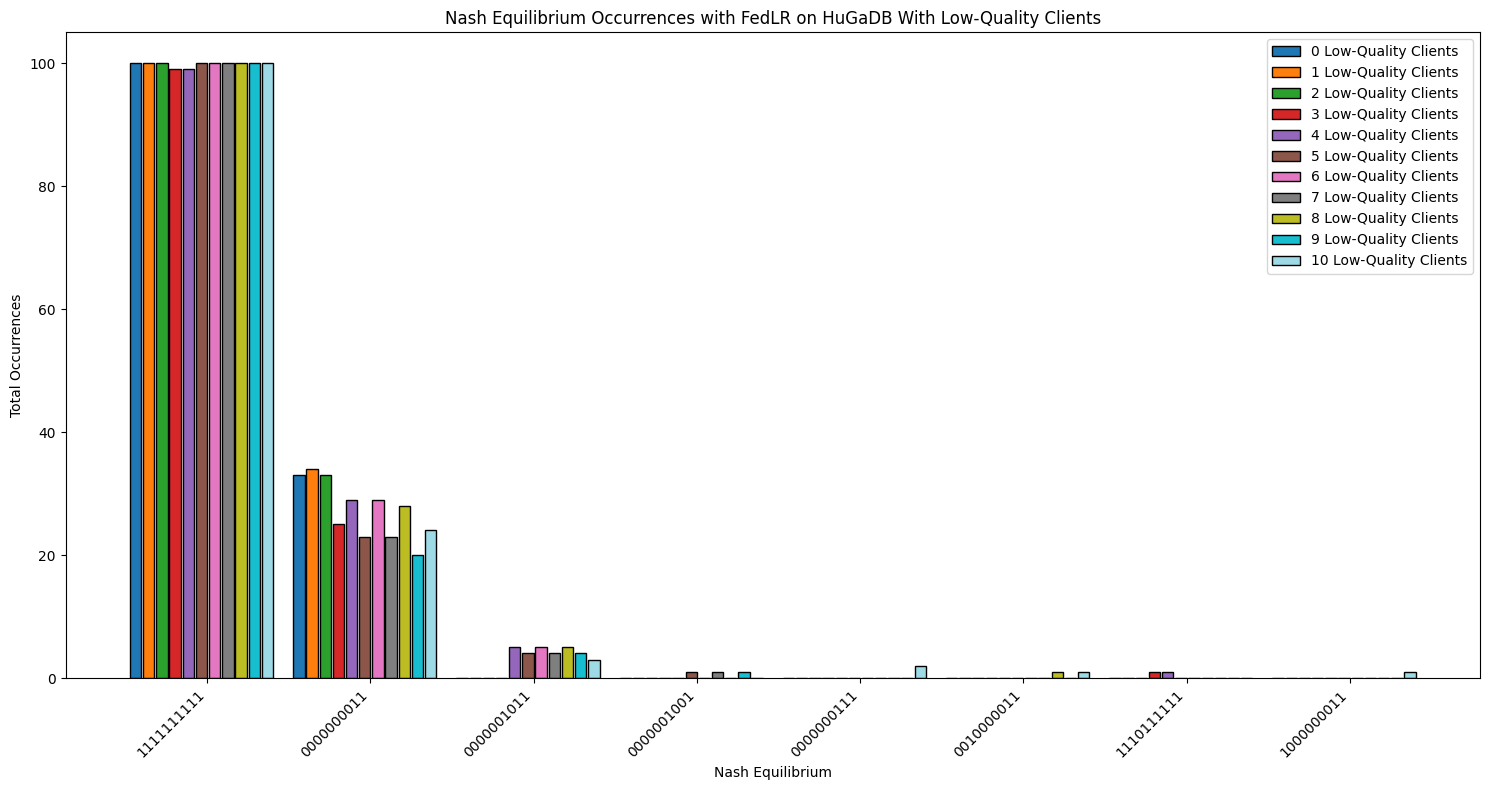

In [ ]:
csv_filename = ".../results/FedLR_HuGaDB_LQC_0_to_10/FedLR_HuGaDB_With_LQC_Noise_0.1.csv"
algorithm_name ="FedLR"
dataset_name = "HuGaDB"
plot_nash_equilibrium(csv_filename, algorithm_name, dataset_name,top_n=10)


#### FedFor on HuGaDB - 100 Trials in total

/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_2073/3476458182.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", num_categories)


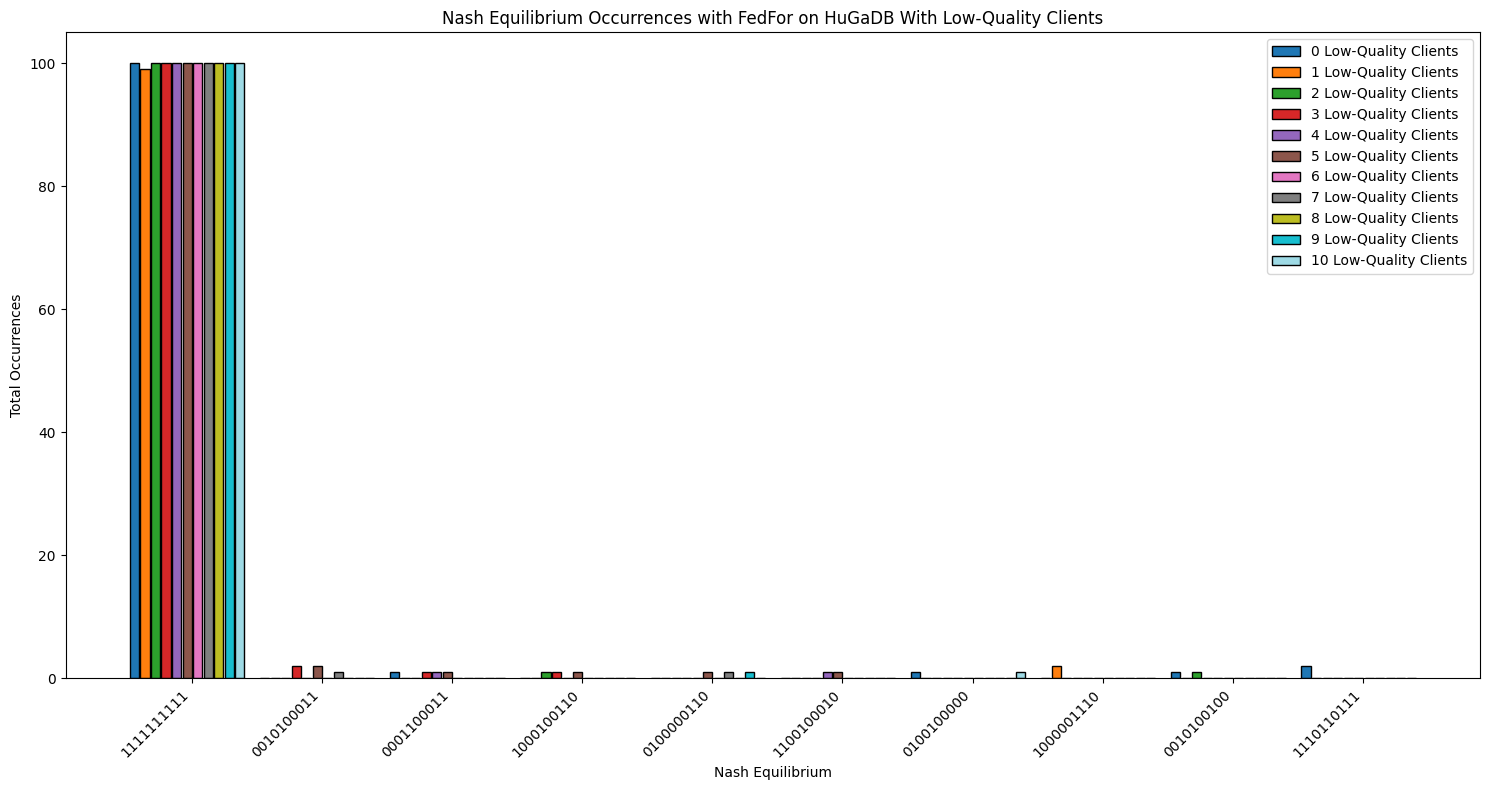

In [ ]:
csv_filename = ".../results/FedFor_HuGaDB_LQC_0_to_10/FedFor_HuGaDB_With_LQC_Noise_0.1.csv"
algorithm_name ="FedFor"
dataset_name = "HuGaDB"
plot_nash_equilibrium(csv_filename, algorithm_name, dataset_name,top_n=10)


#### FedLR on Spamabase - 100 Trials in total

/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_2073/3476458182.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", num_categories)


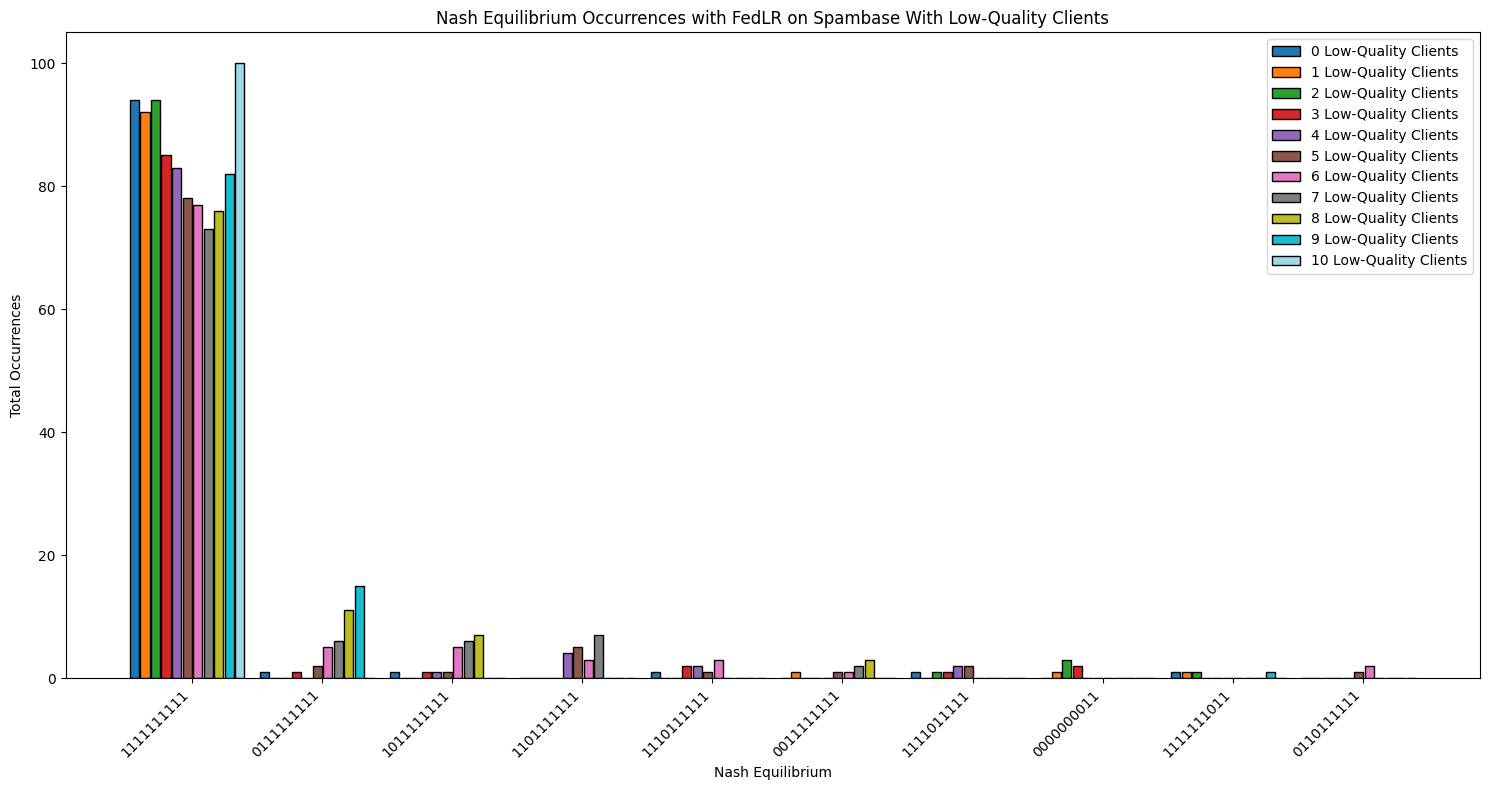

In [ ]:
csv_filename = ".../results/FedLR_Spambase_LQC_0_to_10/FedLR_Spambase_With_LQC_Noise_0.1.csv"
algorithm_name ="FedLR"
dataset_name = "Spambase"
plot_nash_equilibrium(csv_filename, algorithm_name, dataset_name,top_n=10)


#### FedFor on Spamabase - 100 Trails in total

/var/folders/hn/l1bxr6v97478sfly3rj76my40000gn/T/ipykernel_2073/3476458182.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", num_categories)


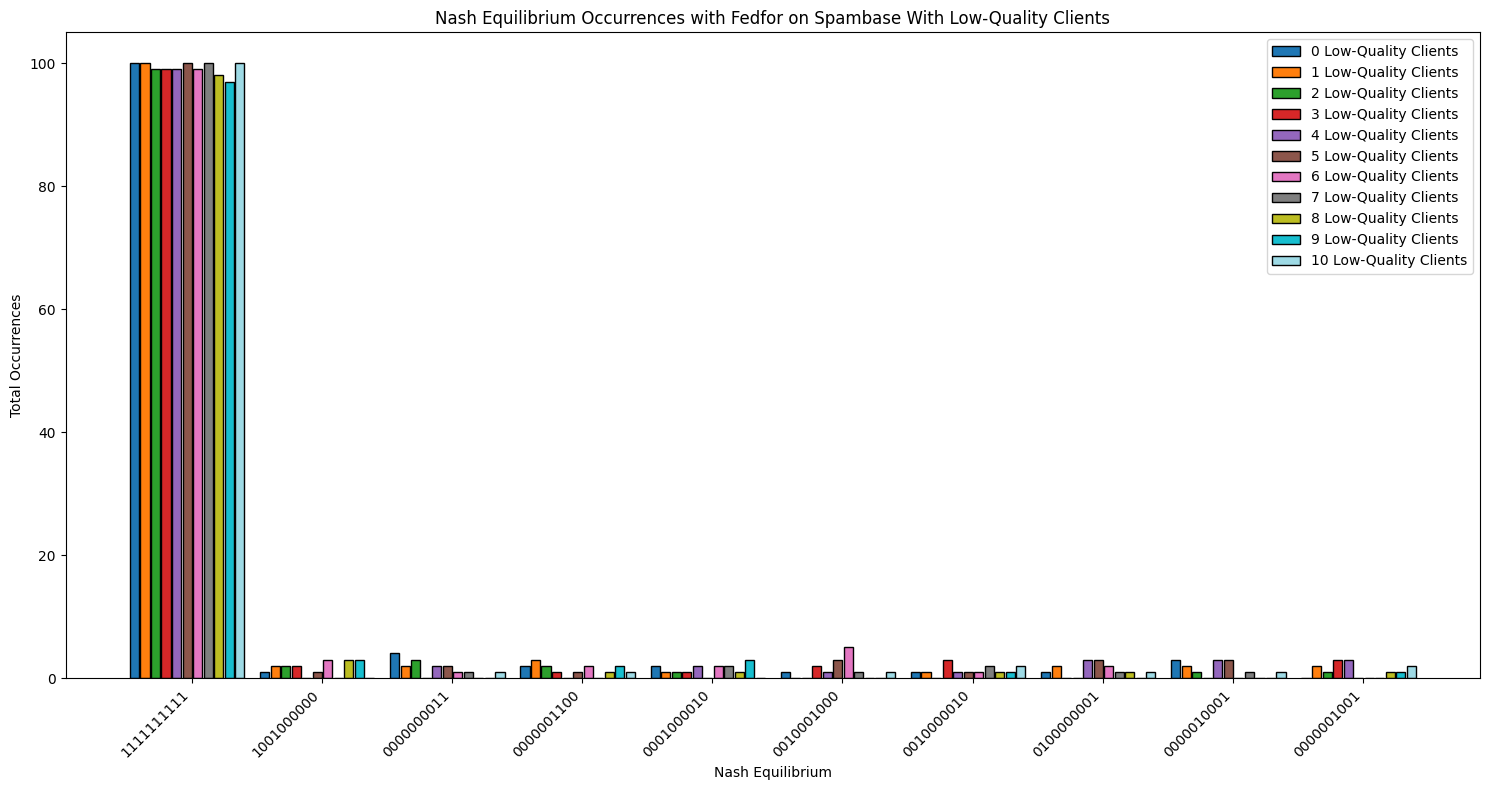

In [ ]:
csv_filename = ".../results/FedFor_Spambase_LQC_0_to_10/FedFor_Spambase_With_LQC_Noise_0.1.csv"
algorithm_name ="Fedfor"
dataset_name = "Spambase"
plot_nash_equilibrium(csv_filename, algorithm_name, dataset_name,top_n=10)


### Nash Equilibrium Occurrences without Low-Quality Clients

#### FedLR on HuGaDB and Spambase without low-quality clients

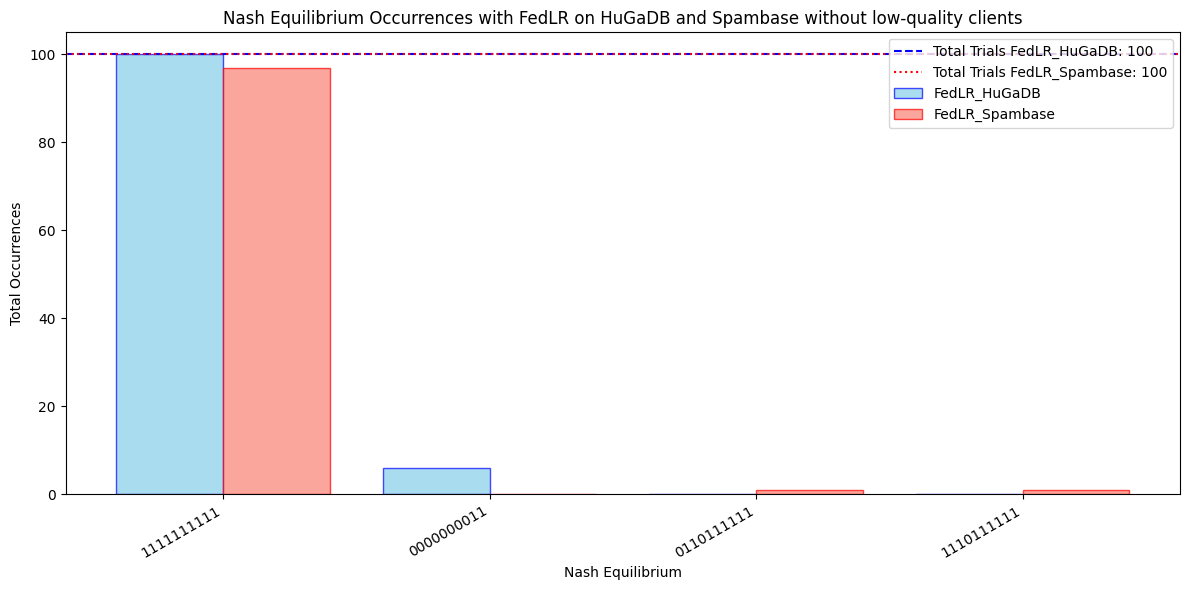

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


csv_filename = ".../results/FedLR_Without_LQC.csv"
df = pd.read_csv(csv_filename, dtype={"Nash Equilibrium": str})


df["Nash Equilibrium"] = df["Nash Equilibrium"].apply(lambda x: x.zfill(10))

df["Total"] = df["FedLR_HuGaDB"] + df["FedLR_Spambase"]
df.sort_values("Total", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True) 


fig, ax = plt.subplots(figsize=(12, 6))
x_labels = df["Nash Equilibrium"]
x = np.arange(len(x_labels))
bar_width = 0.4


ax.bar(x - bar_width/2, df["FedLR_HuGaDB"], width=bar_width, label="FedLR_HuGaDB",
       color="skyblue", edgecolor="blue", alpha=0.7)
ax.bar(x + bar_width/2, df["FedLR_Spambase"], width=bar_width, label="FedLR_Spambase",
       color="salmon", edgecolor="red", alpha=0.7)


total_trials_hugadb = 100
total_trials_spambase = 100
ax.axhline(y=total_trials_hugadb, linestyle="dashed", color="blue",
           label=f"Total Trials FedLR_HuGaDB: {total_trials_hugadb}")
ax.axhline(y=total_trials_spambase, linestyle="dotted", color="red",
           label=f"Total Trials FedLR_Spambase: {total_trials_spambase}")


ax.set_xlabel("Nash Equilibrium")
ax.set_ylabel("Total Occurrences")
ax.set_title("Nash Equilibrium Occurrences with FedLR on HuGaDB and Spambase without low-quality clients")


ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=30, ha="right", fontsize=10)

ax.legend(loc="upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


#### FedFor on HuGaDB and Spambase without low-quality clients

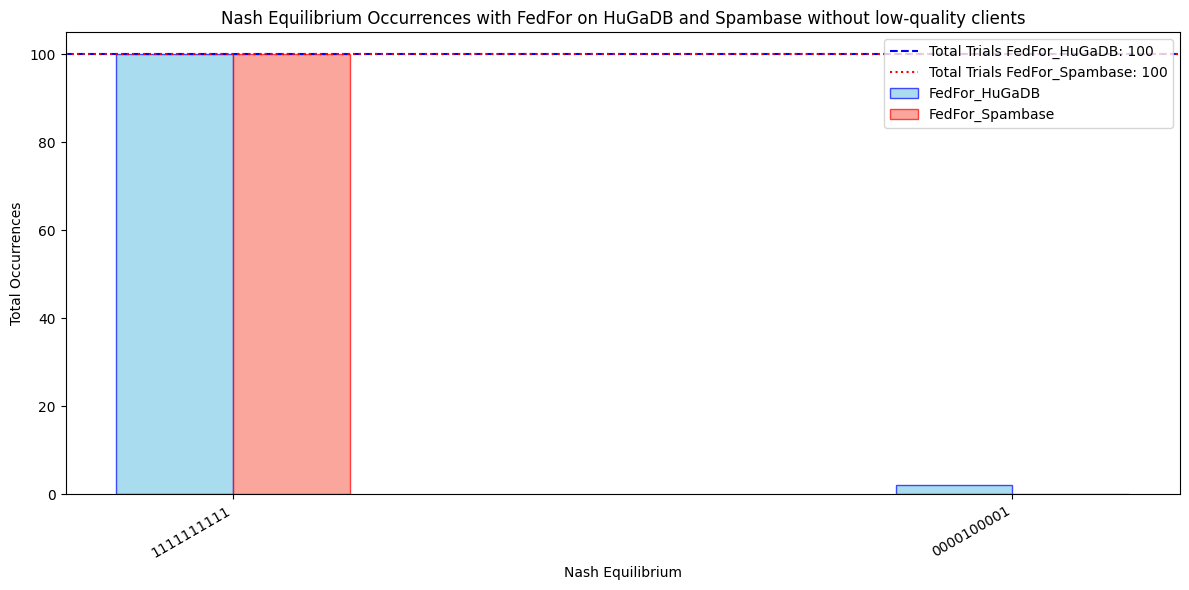

In [ ]:
csv_filename = ".../results/FedFor_Without_LQC.csv"
df = pd.read_csv(csv_filename, dtype={"Nash Equilibrium": str})


df["Nash Equilibrium"] = df["Nash Equilibrium"].apply(lambda x: x.zfill(10))


df["Total"] = df["FedFor_HuGaDB"] + df["FedFor_Spambase"]
df.sort_values("Total", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)  


fig, ax = plt.subplots(figsize=(12, 6))
x_labels = df["Nash Equilibrium"]
x = np.arange(len(x_labels))
bar_width = 0.15


ax.bar(x - bar_width/2, df["FedFor_HuGaDB"], width=bar_width, label="FedFor_HuGaDB",
       color="skyblue", edgecolor="blue", alpha=0.7)
ax.bar(x + bar_width/2, df["FedFor_Spambase"], width=bar_width, label="FedFor_Spambase",
       color="salmon", edgecolor="red", alpha=0.7)


total_trials_hugadb = 100
total_trials_spambase = 100
ax.axhline(y=total_trials_hugadb, linestyle="dashed", color="blue",
           label=f"Total Trials FedFor_HuGaDB: {total_trials_hugadb}")
ax.axhline(y=total_trials_spambase, linestyle="dotted", color="red",
           label=f"Total Trials FedFor_Spambase: {total_trials_spambase}")


ax.set_xlabel("Nash Equilibrium")
ax.set_ylabel("Total Occurrences")
ax.set_title("Nash Equilibrium Occurrences with FedFor on HuGaDB and Spambase without low-quality clients")


ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=30, ha="right", fontsize=10)

ax.legend(loc="upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
